In [1]:
#Standard packages
import pandas as pd
import numpy as np
import matplotlib

# Scikit Learn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import MultinomialNB

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

#Plotting
from matplotlib import pyplot as plt
# Allow plots in Notebook
%matplotlib inline

In [2]:
# Import the transcript file and assign variable names to the columns
df = pd.read_csv("D:/Documents/Data/case_study_data_tiny.csv")
y = df['product_group']
X = df['text']

In [13]:
# Get complaint fequency distribution by product count
df_freq = df.groupby('product_group').text.count()
df_freq

product_group
bank_service         4388
credit_card          6405
credit_reporting    17876
debt_collection     13445
loan                 6871
money_transfers      1014
Name: text, dtype: int64

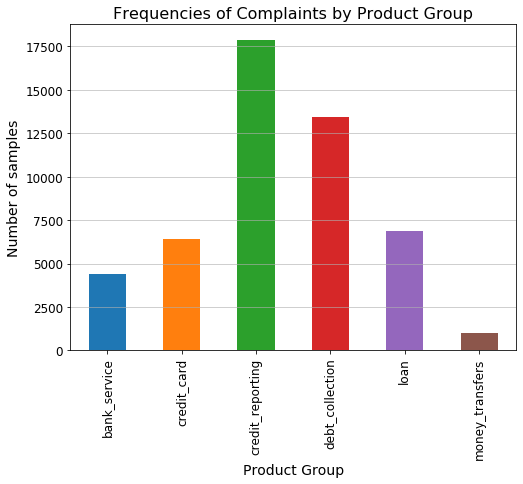

In [11]:
# Create a histogram of complaint fequency distribution by product count

# Set the figure size to be plotted
plt.figure(figsize=[8,6]) 
# Get the complaint counts by product group. 
# The text.count counts the complaint. 
# The group by sorts them into the product groups
# The plot.bar parameter sets the plot to a histogram
df.groupby('product_group').text.count().plot.bar(ylim=0)
# Set horizontal grid lines on the plot
plt.grid(axis='y', alpha=0.75)
# Set the font size for the vertical and horizontal axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Set the font size for the title and axes names
plt.ylabel('Number of samples', fontsize=14)
plt.xlabel('Product Group', fontsize=14)
plt.title('Frequencies of Complaints by Product Group', fontsize=16)
# display the histogram
plt.show()

In [3]:
# Get train and test sets (sampled from transcript file)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [4]:
# This is not a BOW process. We just want tho inspect the data
# Get product group names (dependent variable) using feature extraction
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(y_train)
# Get feature names - these are product group names (i.e. checking, loans, etc.)
print(vectorizer.get_feature_names())

['bank_service', 'credit_card', 'credit_reporting', 'debt_collection', 'loan', 'money_transfers']


BOW IN ONE STEP

In [5]:
# Create BOW in one step
# Set up the BOW Transformer
vectorizer = CountVectorizer()
bow_transformer_train=CountVectorizer().fit(X_train)
bow_transformer_test=CountVectorizer().fit(X_test)

# Generate the BOW
bow_transformer=vectorizer.fit(X_train)
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test)#ONLY TEST DATA

# instantiating the model with Multinomial Naive Bayes
mnb_clf = MultinomialNB()

# training the model...
mnb_clf = mnb_clf.fit(text_bow_train, y_train)

# Score the model fit for the train set
mnb_clf.score(text_bow_train, y_train)

0.8238806823052087

In [6]:
# Predict Outcomes using the MultinomialNB() model
predicted = mnb_clf.predict(text_bow_test)
# Score the model fit
mnb_clf.score(text_bow_test, y_test)

0.8013333333333333

In [7]:
# Convert a product categories to a matrix of token counts 
from sklearn import metrics
vectorizer = CountVectorizer()
y_test_counts = vectorizer.fit_transform(y_test)
features = vectorizer.get_feature_names()
# Get and print the model performance scores
print(metrics.classification_report(y_test, predicted, target_names=features))

                  precision    recall  f1-score   support

    bank_service       0.77      0.84      0.80      1307
     credit_card       0.73      0.78      0.75      1945
credit_reporting       0.84      0.84      0.84      5396
 debt_collection       0.83      0.77      0.80      3975
            loan       0.74      0.80      0.77      2089
 money_transfers       0.93      0.44      0.59       288

     avg / total       0.80      0.80      0.80     15000



                  precision    recall  f1-score   support

    bank_service       0.77      0.84      0.80      1307
     credit_card       0.73      0.78      0.75      1945
credit_reporting       0.84      0.84      0.84      5396
 debt_collection       0.83      0.77      0.80      3975
            loan       0.74      0.80      0.77      2089
 money_transfers       0.93      0.44      0.59       288

     avg / total       0.80      0.80      0.80     15000



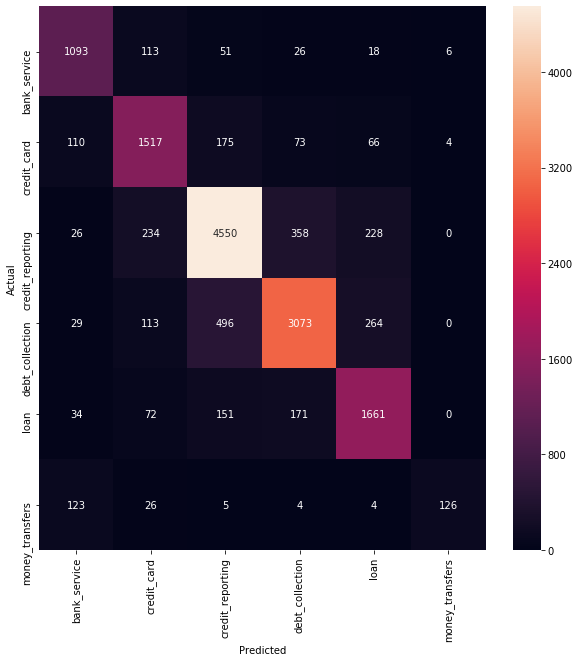

In [9]:
#mnb_class = MultinomialNB()
import seaborn as sns
# Fit the MultinomialNB classifier with the train set
mnb_clf.fit(text_bow_train, y_train)
# Make predictions with the test set
y_pred = mnb_clf.predict(text_bow_test)
# Extract the features and name them target_names
features = vectorizer.get_feature_names()
print(metrics.classification_report(y_test, predicted, target_names=features))
# Load the confusion matrix library and create a confusion matrix 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap chart of the confusion matrix using the seaborn library
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=features, yticklabels=features)
# Label the axes and disply the heatmap
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()